<a href="https://colab.research.google.com/github/AdSahas/PneumoniaPrediction/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/train_test_data.zip

Archive:  /content/train_test_data.zip
   creating: content/train/
  inflating: content/train/normal00000732_003.png  
  inflating: content/train/normal00001072_001.png  
  inflating: content/train/normal00000151_002.png  
  inflating: content/train/normal00000466_001.png  
  inflating: content/train/normal00000927_002.png  
  inflating: content/train/pneumoniaperson1328_bacteria_3376.jpeg  
  inflating: content/train/normal00000616_000.png  
  inflating: content/train/normal00000191_000.png  
  inflating: content/train/pneumoniaperson1463_bacteria_3809.jpeg  
  inflating: content/train/normal00000242_002.png  
  inflating: content/train/normal00000556_002.png  
  inflating: content/train/normal00000391_005.png  
  inflating: content/train/pneumoniaperson84_virus_157.jpeg  
  inflating: content/train/pneumoniaperson328_bacteria_1513.jpeg  
  inflating: content/train/pneumoniaperson1502_bacteria_3924.jpeg  
  inflating: content/train/normal00000391_004.png  
  inflating: content/train/n

In [ ]:
# prompt: /content/content/train - in this folder, create 2 new subdirectors. pneumonia and normal. for the files that start with "pneumonia" in their names, put them in pneumonia folder. for those starting with "normal", put them into normal folder.

import os
import shutil

# Create the subdirectories
os.makedirs('/content/content/train/pneumonia', exist_ok=True)
os.makedirs('/content/content/train/normal', exist_ok=True)

# Define the source directory
source_dir = '/content/content/train'

# List all files in the source directory
all_files = os.listdir(source_dir)

# Move files to the respective subdirectories
for filename in all_files:
    if filename.startswith('pneumonia'):
        shutil.move(os.path.join(source_dir, filename), '/content/content/train/pneumonia')
    elif filename.startswith('normal'):
        shutil.move(os.path.join(source_dir, filename), '/content/content/train/normal')

print("Files organized into 'pneumonia' and 'normal' subdirectories.")


Files organized into 'pneumonia' and 'normal' subdirectories.


In [ ]:
# prompt: repeat the same for the test folder.

# Create the subdirectories for test
os.makedirs('/content/content/test/pneumonia', exist_ok=True)
os.makedirs('/content/content/test/normal', exist_ok=True)

# Define the source directory for test
source_dir_test = '/content/content/test'

# List all files in the source directory for test
all_files_test = os.listdir(source_dir_test)

# Move files to the respective subdirectories for test
for filename in all_files_test:
    if filename.startswith('pneumonia'):
        shutil.move(os.path.join(source_dir_test, filename), '/content/content/test/pneumonia')
    elif filename.startswith('normal'):
        shutil.move(os.path.join(source_dir_test, filename), '/content/content/test/normal')

print("Test files organized into 'pneumonia' and 'normal' subdirectories.")

Test files organized into 'pneumonia' and 'normal' subdirectories.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
train_dir = "/content/content/train"
test_dir = "/content/content/test"

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        shuffle=True,
        class_mode='binary')

Found 2440 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        shuffle=True,
        class_mode='binary')

Found 610 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 175232)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    11,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,215,873 (42.79 MB)

 Trainable params: 11,215,873 (42.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
trainer = model.fit(train_generator, epochs=3, validation_data=test_generator, callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.6649 - loss: 2.7568

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


77/77 ━━━━━━━━━━━━━━━━━━━━ 38s 456ms/step - accuracy: 0.6667 - loss: 2.7353 - val_accuracy: 0.9393 - val_loss: 0.2120
Epoch 2/3
77/77 ━━━━━━━━━━━━━━━━━━━━ 32s 418ms/step - accuracy: 0.9261 - loss: 0.2390 - val_accuracy: 0.9344 - val_loss: 0.2067
Epoch 3/3
77/77 ━━━━━━━━━━━━━━━━━━━━ 33s 429ms/step - accuracy: 0.9273 - loss: 0.2207 - val_accuracy: 0.9492 - val_loss: 0.1914


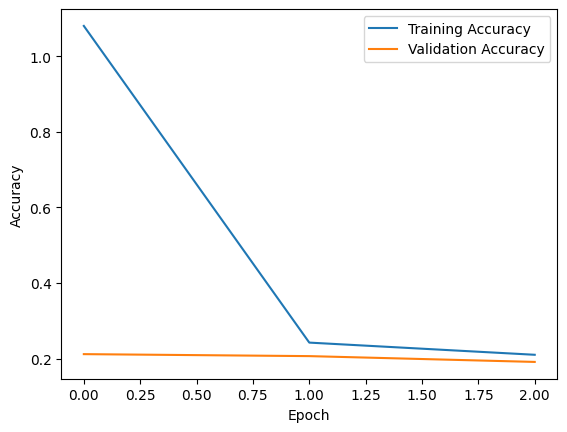

20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 298ms/step - accuracy: 0.9520 - loss: 0.1858
Test Accuracy: 94.92%
Test Loss: 0.1914


In [ ]:
plt.figure()
plt.plot(trainer.history['loss'], label='Training Accuracy')
plt.plot(trainer.history['val_loss'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")


In [ ]:
model.save('xray_pneumonia_classifier.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


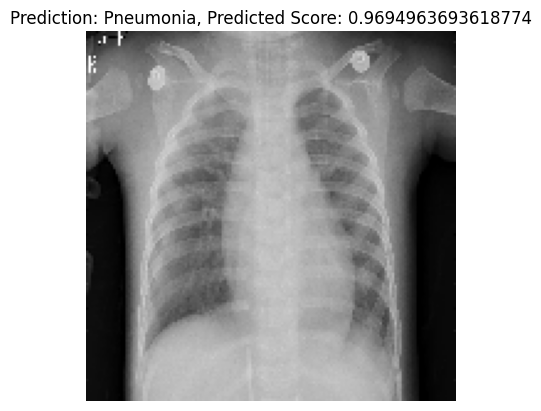

In [ ]:
def visualize_predictions(file_path, model):
    img = image.load_img(file_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    predictions = model.predict(img_array)
    class_names = ['Normal', 'Pneumonia']

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {class_names[int(predictions[0][0] > 0.5)]}, Predicted Score: {predictions[0][0]}")
    plt.show()

visualize_predictions("/content/content/test/pneumonia/pneumoniaperson1420_virus_2431.jpeg", model)